# This Notebook is run on EC2 g4dn.4xlarge resources provided using papermill library. This notebook needs to be opened on VSCode to show all output.

It took some time for the whole notebook to run.

This notebook is located in final_presentation/ folder

To run this notebook on remote server terminal, install all packages in requirements.txt and run this command "**python3 run_notebook.py**" on final_presentation folder.

In [2]:
cd ..

c:\Users\clift\github\h2o2.ai


In [2]:
import inspect
from final_presentation.run_notebook import run_notebook

lines = inspect.getsource(run_notebook)
print(lines)

def run_notebook():
   pm.execute_notebook(
      'voc_presentation_notebook.ipynb',
      'voc_presentation_notebook_output.ipynb',
   )



# FileUtil Initialization

FileUtil is a class used to access storage (saving and retrieving models and files)

In [3]:
from src.utils.file_util import FileUtil

file_util = FileUtil()

In [ ]:
print("Methods in FileUtil:", [func for func in dir(FileUtil) if callable(getattr(FileUtil, func)) and not func.startswith("__")])
print()
print("Attributes in FileUtil:", list(FileUtil().__dict__.keys()))

Methods in FileUtil: ['check_dir_exists', 'check_filepath_exists', 'create_dir_if_not_exists', 'get_config', 'get_csv', 'get_json', 'get_metrics', 'get_pkl', 'get_processed_train_data', 'get_raw_train_data', 'get_sentiment_viz_png', 'get_topic_model', 'get_topics_html', 'get_yml', 'put_csv', 'put_json', 'put_metrics', 'put_pkl', 'put_predicted_df', 'put_processed_train_data', 'put_topic_model', 'put_topics_html']

Attributes in FileUtil: ['PROJECT_DIR', 'CONFIG_FILE_NAME', 'CONFIG_PARAMS', 'TEST_FILE_NAME', 'TRAIN_FILE_NAME', 'MODEL_FILE_NAME', 'METRICS_FILE_NAME', 'BERT_TRAINING_GRAPH_FILENAME', 'LSTM_TRAINING_GRAPH_FILENAME', 'LDA_TOPIC_FILE_NAME', 'BERTOPIC_TOPIC_FILE_NAME', 'NMF_TOPIC_FILE_NAME', 'RAW_DATA_DIR', 'PROCESSED_DATA_DIR', 'PREDICTED_DATA_DIR', 'SENTIMENT_ANALYSIS_DIR', 'TOPIC_MODELLING_DIR', 'SENTIMENT_ANALYSIS_TRAIN_DIR', 'SENTIMENT_ANALYSIS_EVAL_DIR', 'BERT_SENTIMENT_MODEL_DIR', 'BERT_TRAINING_GRAPH_FILE_PATH', 'LSTM_SENTIMENT_MODEL_DIR', 'LSTM_TRAINING_GRAPH_FILE_PAT

# Raw Train Data

Raw train data is stored in data/raw/reviews.csv

The file path is specified in config

In [ ]:
file_util.get_raw_train_data()

,Sentiment,Time,Text
0,positive,18/6/21,This is a very healthy dog food. Good for thei...
1,positive,7/7/21,I've been very pleased with the Natural Balanc...
2,positive,18/6/21,"Before I was educated about feline nutrition, ..."
3,positive,7/7/21,"My holistic vet recommended this, along with a..."
4,positive,1/7/21,I bought this coffee because its much cheaper ...
...,...,...,...
5439,negative,26/2/21,"This is an okay gift box, only if you like med..."
5440,negative,18/12/19,It looks llike I just walked into a raw deal. ...
5441,negative,19/1/20,Thank god that i tasted the metal before i swa...
5442,negative,13/9/20,This product was very good when I began buying...


# Preprocessing

Before model training, we need to preprocess the train data since model training process will retrieve the processed train data directly. **preprocess_train** method will preprocess train data and save the preprocessed data into storage.

Note: To run preprocessing via terminal, run this command "**python3 -m src.preprocessing.transformations**" on h2o2.ai project folder.

In [ ]:
from src.preprocessing.transformations import preprocess_train

In [ ]:
preprocess_train()

In [ ]:
file_util.get_processed_train_data()

,date,partially_cleaned_text,sentiment,cleaned_text
0,18/6/21,This is a very healthy dog food. Good for thei...,1,healthy dog food good digestion also good smal...
1,7/7/21,I've been very pleased with the Natural Balanc...,1,pleased natural balance dog food dogs issues d...
2,18/6/21,"Before I was educated about feline nutrition, ...",1,educated feline nutrition allowed cats become ...
3,7/7/21,"My holistic vet recommended this, along with a...",1,holistic vet recommended along brands tried ca...
4,1/7/21,I bought this coffee because its much cheaper ...,1,bought coffee much cheaper ganocafe organic re...
...,...,...,...,...
5439,26/2/21,"This is an okay gift box, only if you like med...",0,okay gift box like mediocre cheese summer saus...
5440,18/12/19,It looks llike I just walked into a raw deal. ...,0,looks llike walked raw deal item intolerably s...
5441,19/1/20,Thank god that i tasted the metal before i swa...,0,thank god tasted metal swallowed even get got ...
5442,13/9/20,This product was very good when I began buying...,0,product good began buying lately terrible tast...


In [ ]:
lines = inspect.getsource(preprocess_train)
print(lines)

def preprocess_train():
    """
    Applies cleaning to raw training data in according
    to filepath specified in FileUtil module.
    Saves processed training data to filepath specified
    in FileUtil module.
    """
    df = FileUtil.get_raw_train_data()
    df = apply_cleaning_train(df)

    FileUtil.put_processed_train_data(df)



In [ ]:
from src.preprocessing.transformations import apply_cleaning_train

lines = inspect.getsource(apply_cleaning_train)
print(lines)

def apply_cleaning_train(df: pd.DataFrame) -> pd.DataFrame:
    """
    Applies cleaning to training data as follows:
    1. Converts sentiment column to binary integer format
    2. Removes HTML tags, multiple spaces and trailing leading spaces
    to form partially_cleaned_text column.
    3. Removes HTML tags, multiple spaces, trailing leading spaces,
    stopwords and numbers. Lowercases text, expands contractions and
    removes empty reviews to form cleaned_text column.
    4. Renames Time column to date

    Args:
        df (pd.Dataframe): input dataframe with columns Text,
        Sentiment and Time

    Returns:
        df (pd.Dataframe): dataframe consisting of new text columns
        partially_cleaned_text and cleaned_text.
    """
    return (
        df.pipe(convert_sentiment_df)
        .pipe(strip_html_tags_df, src_col="Text", dst_col="Text")
        .pipe(replace_multiple_spaces_df, src_col="Text", dst_col="Text")
        .pipe(remove_trailing_leading_spaces_df,
     

# Sentiment Analysis

## Training

We experimented with 3 models:
1. BERT
2. LSTM with Word2Vec embeddings
3. Logistic Regression with Word2Vec embeddings

All models trained are saved into storage and can be used for prediction.

Takes 30 minutes to train on EC2 instance.

Note: To run sentiment analysis training via terminal, run this command "**python3 -m src.models.sentiment_analysis.train.train**" on h2o2.ai project folder.

In [ ]:
from src.models.sentiment_analysis.train.train import sentiment_analysis_train

2023-04-09 12:15:37.018384: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-09 12:15:37.020982: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-09 12:15:37.068550: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-09 12:15:37.069423: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-04-09 12:15:37.827194: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


/home/ubuntu/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


All model checkpoint layers were used when initializing TFBertForSequenceClassification.



Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/home/ubuntu/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/20


2023-04-09 12:16:00.658440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



      1/Unknown - 33s 33s/step - loss: 0.6491 - accuracy: 0.6953


      2/Unknown - 38s 5s/step - loss: 0.6007 - accuracy: 0.7305 


      3/Unknown - 43s 5s/step - loss: 0.5877 - accuracy: 0.7396


      4/Unknown - 48s 5s/step - loss: 0.6043 - accuracy: 0.7266


      5/Unknown - 53s 5s/step - loss: 0.5975 - accuracy: 0.7297


      6/Unknown - 58s 5s/step - loss: 0.5956 - accuracy: 0.7292


      7/Unknown - 63s 5s/step - loss: 0.5948 - accuracy: 0.7277


      8/Unknown - 68s 5s/step - loss: 0.5890 - accuracy: 0.7305


      9/Unknown - 73s 5s/step - loss: 0.5809 - accuracy: 0.7361


     10/Unknown - 78s 5s/step - loss: 0.5773 - accuracy: 0.7367


     11/Unknown - 83s 5s/step - loss: 0.5717 - accuracy: 0.7401


     12/Unknown - 88s 5s/step - loss: 0.5691 - accuracy: 0.7389


     13/Unknown - 93s 5s/step - loss: 0.5653 - accuracy: 0.7404


     14/Unknown - 98s 5s/step - loss: 0.5604 - accuracy: 0.7439


     15/Unknown - 103s 5s/step - loss: 0.5542 - accuracy: 0.7453


     16/Unknown - 108s 5s/step - loss: 0.5474 - accuracy: 0.7510


     17/Unknown - 113s 5s/step - loss: 0.5435 - accuracy: 0.7546


     18/Unknown - 118s 5s/step - loss: 0.5361 - accuracy: 0.7591


     19/Unknown - 122s 5s/step - loss: 0.5303 - accuracy: 0.7619


     20/Unknown - 127s 5s/step - loss: 0.5239 - accuracy: 0.7645


     21/Unknown - 132s 5s/step - loss: 0.5176 - accuracy: 0.7675


     22/Unknown - 137s 5s/step - loss: 0.5126 - accuracy: 0.7692


     23/Unknown - 142s 5s/step - loss: 0.5063 - accuracy: 0.7717


     24/Unknown - 147s 5s/step - loss: 0.5025 - accuracy: 0.7731


     25/Unknown - 152s 5s/step - loss: 0.4925 - accuracy: 0.7791


     26/Unknown - 157s 5s/step - loss: 0.4892 - accuracy: 0.7822


     27/Unknown - 162s 5s/step - loss: 0.4866 - accuracy: 0.7824


     28/Unknown - 167s 5s/step - loss: 0.4791 - accuracy: 0.7860


     29/Unknown - 172s 5s/step - loss: 0.4736 - accuracy: 0.7877


     30/Unknown - 177s 5s/step - loss: 0.4666 - accuracy: 0.7917


     31/Unknown - 182s 5s/step - loss: 0.4626 - accuracy: 0.7941


     32/Unknown - 186s 5s/step - loss: 0.4572 - accuracy: 0.7966


     33/Unknown - 191s 5s/step - loss: 0.4518 - accuracy: 0.8000


     34/Unknown - 196s 5s/step - loss: 0.4454 - accuracy: 0.8033


     35/Unknown - 197s 5s/step - loss: 0.4456 - accuracy: 0.8032

2023-04-09 12:19:17.472939: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



35/35 [==============================] - 213s 5s/step - loss: 0.4456 - accuracy: 0.8032 - val_loss: 0.2820 - val_accuracy: 0.8889


Epoch 2/20



 1/35 [..............................] - ETA: 2:48 - loss: 0.3527 - accuracy: 0.8750


 2/35 [>.............................] - ETA: 2:44 - loss: 0.3210 - accuracy: 0.8789


 3/35 [=>............................] - ETA: 2:38 - loss: 0.3026 - accuracy: 0.8750


 4/35 [==>...........................] - ETA: 2:33 - loss: 0.2861 - accuracy: 0.8848


 5/35 [===>..........................] - ETA: 2:27 - loss: 0.2711 - accuracy: 0.8922


 6/35 [====>.........................] - ETA: 2:22 - loss: 0.2669 - accuracy: 0.8971


 7/35 [=====>........................] - ETA: 2:17 - loss: 0.2686 - accuracy: 0.8929


 8/35 [=====>........................] - ETA: 2:13 - loss: 0.2768 - accuracy: 0.8877


 9/35 [======>.......................] - ETA: 2:08 - loss: 0.2676 - accuracy: 0.8915


10/35 [=======>......................] - ETA: 2:03 - loss: 0.2687 - accuracy: 0.8898


11/35 [========>.....................] - ETA: 1:58 - loss: 0.2709 - accuracy: 0.8899


12/35 [=========>....................] - ETA: 1:53 - loss: 0.2662 - accuracy: 0.8939


13/35 [==========>...................] - ETA: 1:48 - loss: 0.2650 - accuracy: 0.8966


14/35 [===========>..................] - ETA: 1:43 - loss: 0.2636 - accuracy: 0.8979


15/35 [===========>..................] - ETA: 1:38 - loss: 0.2582 - accuracy: 0.9016


16/35 [============>.................] - ETA: 1:33 - loss: 0.2560 - accuracy: 0.9019


17/35 [=============>................] - ETA: 1:28 - loss: 0.2567 - accuracy: 0.9012


18/35 [==============>...............] - ETA: 1:23 - loss: 0.2532 - accuracy: 0.9019


19/35 [===============>..............] - ETA: 1:18 - loss: 0.2501 - accuracy: 0.9021


20/35 [================>.............] - ETA: 1:13 - loss: 0.2485 - accuracy: 0.9027


21/35 [=================>............] - ETA: 1:09 - loss: 0.2471 - accuracy: 0.9036


22/35 [=================>............] - ETA: 1:04 - loss: 0.2495 - accuracy: 0.9027


23/35 [==================>...........] - ETA: 59s - loss: 0.2460 - accuracy: 0.9049 


24/35 [===================>..........] - ETA: 54s - loss: 0.2462 - accuracy: 0.9046


25/35 [====================>.........] - ETA: 49s - loss: 0.2421 - accuracy: 0.9066


26/35 [=====================>........] - ETA: 44s - loss: 0.2438 - accuracy: 0.9062


27/35 [======================>.......] - ETA: 39s - loss: 0.2443 - accuracy: 0.9048


28/35 [=======================>......] - ETA: 34s - loss: 0.2424 - accuracy: 0.9057


29/35 [=======================>......] - ETA: 29s - loss: 0.2408 - accuracy: 0.9068


30/35 [========================>.....] - ETA: 24s - loss: 0.2384 - accuracy: 0.9083


31/35 [=========================>....] - ETA: 19s - loss: 0.2368 - accuracy: 0.9090


32/35 [==========================>...] - ETA: 14s - loss: 0.2334 - accuracy: 0.9109


33/35 [===========================>..] - ETA: 9s - loss: 0.2312 - accuracy: 0.9122 


34/35 [============================>.] - ETA: 4s - loss: 0.2281 - accuracy: 0.9131


35/35 [==============================] - ETA: 0s - loss: 0.2280 - accuracy: 0.9132


35/35 [==============================] - 181s 5s/step - loss: 0.2280 - accuracy: 0.9132 - val_loss: 0.2348 - val_accuracy: 0.9109


Epoch 3/20



 1/35 [..............................] - ETA: 2:47 - loss: 0.2003 - accuracy: 0.9375


 2/35 [>.............................] - ETA: 2:41 - loss: 0.1802 - accuracy: 0.9414


 3/35 [=>............................] - ETA: 2:36 - loss: 0.1665 - accuracy: 0.9401


 4/35 [==>...........................] - ETA: 2:31 - loss: 0.1554 - accuracy: 0.9473


 5/35 [===>..........................] - ETA: 2:27 - loss: 0.1467 - accuracy: 0.9469


 6/35 [====>.........................] - ETA: 2:22 - loss: 0.1370 - accuracy: 0.9531


 7/35 [=====>........................] - ETA: 2:17 - loss: 0.1347 - accuracy: 0.9542


 8/35 [=====>........................] - ETA: 2:12 - loss: 0.1392 - accuracy: 0.9521


 9/35 [======>.......................] - ETA: 2:07 - loss: 0.1317 - accuracy: 0.9549


10/35 [=======>......................] - ETA: 2:02 - loss: 0.1314 - accuracy: 0.9563


11/35 [========>.....................] - ETA: 1:57 - loss: 0.1357 - accuracy: 0.9553


12/35 [=========>....................] - ETA: 1:52 - loss: 0.1358 - accuracy: 0.9538


13/35 [==========>...................] - ETA: 1:48 - loss: 0.1390 - accuracy: 0.9537


14/35 [===========>..................] - ETA: 1:43 - loss: 0.1374 - accuracy: 0.9537


15/35 [===========>..................] - ETA: 1:38 - loss: 0.1358 - accuracy: 0.9547


16/35 [============>.................] - ETA: 1:33 - loss: 0.1360 - accuracy: 0.9551


17/35 [=============>................] - ETA: 1:28 - loss: 0.1362 - accuracy: 0.9527


18/35 [==============>...............] - ETA: 1:23 - loss: 0.1343 - accuracy: 0.9531


19/35 [===============>..............] - ETA: 1:18 - loss: 0.1346 - accuracy: 0.9519


20/35 [================>.............] - ETA: 1:13 - loss: 0.1351 - accuracy: 0.9512


21/35 [=================>............] - ETA: 1:08 - loss: 0.1335 - accuracy: 0.9513


22/35 [=================>............] - ETA: 1:03 - loss: 0.1344 - accuracy: 0.9503


23/35 [==================>...........] - ETA: 58s - loss: 0.1324 - accuracy: 0.9514 


24/35 [===================>..........] - ETA: 54s - loss: 0.1333 - accuracy: 0.9518


25/35 [====================>.........] - ETA: 49s - loss: 0.1295 - accuracy: 0.9534


26/35 [=====================>........] - ETA: 44s - loss: 0.1310 - accuracy: 0.9534


27/35 [======================>.......] - ETA: 39s - loss: 0.1299 - accuracy: 0.9537


28/35 [=======================>......] - ETA: 34s - loss: 0.1281 - accuracy: 0.9548


29/35 [=======================>......] - ETA: 29s - loss: 0.1274 - accuracy: 0.9542


30/35 [========================>.....] - ETA: 24s - loss: 0.1260 - accuracy: 0.9549


31/35 [=========================>....] - ETA: 19s - loss: 0.1239 - accuracy: 0.9556


32/35 [==========================>...] - ETA: 14s - loss: 0.1216 - accuracy: 0.9565


33/35 [===========================>..] - ETA: 9s - loss: 0.1219 - accuracy: 0.9564 


34/35 [============================>.] - ETA: 4s - loss: 0.1194 - accuracy: 0.9577


35/35 [==============================] - ETA: 0s - loss: 0.1193 - accuracy: 0.9577


35/35 [==============================] - 181s 5s/step - loss: 0.1193 - accuracy: 0.9577 - val_loss: 0.2687 - val_accuracy: 0.9063


Epoch 4/20



 1/35 [..............................] - ETA: 2:48 - loss: 0.1193 - accuracy: 0.9609


 2/35 [>.............................] - ETA: 2:42 - loss: 0.1136 - accuracy: 0.9688


 3/35 [=>............................] - ETA: 2:37 - loss: 0.0888 - accuracy: 0.9766


 4/35 [==>...........................] - ETA: 2:32 - loss: 0.0883 - accuracy: 0.9766


 5/35 [===>..........................] - ETA: 2:27 - loss: 0.0825 - accuracy: 0.9781


 6/35 [====>.........................] - ETA: 2:22 - loss: 0.0747 - accuracy: 0.9792


 7/35 [=====>........................] - ETA: 2:17 - loss: 0.0708 - accuracy: 0.9799


 8/35 [=====>........................] - ETA: 2:12 - loss: 0.0749 - accuracy: 0.9775


 9/35 [======>.......................] - ETA: 2:07 - loss: 0.0731 - accuracy: 0.9792


10/35 [=======>......................] - ETA: 2:03 - loss: 0.0742 - accuracy: 0.9797


11/35 [========>.....................] - ETA: 1:58 - loss: 0.0777 - accuracy: 0.9794


12/35 [=========>....................] - ETA: 1:53 - loss: 0.0763 - accuracy: 0.9792


13/35 [==========>...................] - ETA: 1:48 - loss: 0.0793 - accuracy: 0.9784


14/35 [===========>..................] - ETA: 1:43 - loss: 0.0777 - accuracy: 0.9788


15/35 [===========>..................] - ETA: 1:38 - loss: 0.0817 - accuracy: 0.9776


16/35 [============>.................] - ETA: 1:33 - loss: 0.0830 - accuracy: 0.9771


17/35 [=============>................] - ETA: 1:28 - loss: 0.0801 - accuracy: 0.9779


18/35 [==============>...............] - ETA: 1:23 - loss: 0.0779 - accuracy: 0.9787


19/35 [===============>..............] - ETA: 1:18 - loss: 0.0765 - accuracy: 0.9786


20/35 [================>.............] - ETA: 1:13 - loss: 0.0771 - accuracy: 0.9773


21/35 [=================>............] - ETA: 1:08 - loss: 0.0761 - accuracy: 0.9777


22/35 [=================>............] - ETA: 1:03 - loss: 0.0759 - accuracy: 0.9769


23/35 [==================>...........] - ETA: 58s - loss: 0.0750 - accuracy: 0.9776 


24/35 [===================>..........] - ETA: 54s - loss: 0.0753 - accuracy: 0.9779


25/35 [====================>.........] - ETA: 49s - loss: 0.0742 - accuracy: 0.9781


26/35 [=====================>........] - ETA: 44s - loss: 0.0761 - accuracy: 0.9778


27/35 [======================>.......] - ETA: 39s - loss: 0.0753 - accuracy: 0.9780


28/35 [=======================>......] - ETA: 34s - loss: 0.0738 - accuracy: 0.9785


29/35 [=======================>......] - ETA: 29s - loss: 0.0725 - accuracy: 0.9790


30/35 [========================>.....] - ETA: 24s - loss: 0.0733 - accuracy: 0.9786


31/35 [=========================>....] - ETA: 19s - loss: 0.0717 - accuracy: 0.9791


32/35 [==========================>...] - ETA: 14s - loss: 0.0706 - accuracy: 0.9792


33/35 [===========================>..] - ETA: 9s - loss: 0.0704 - accuracy: 0.9794 


34/35 [============================>.] - ETA: 4s - loss: 0.0693 - accuracy: 0.9795


35/35 [==============================] - ETA: 0s - loss: 0.0693 - accuracy: 0.9796


35/35 [==============================] - 181s 5s/step - loss: 0.0693 - accuracy: 0.9796 - val_loss: 0.2840 - val_accuracy: 0.9073


Epoch 5/20



 1/35 [..............................] - ETA: 2:48 - loss: 0.0713 - accuracy: 0.9844


 2/35 [>.............................] - ETA: 2:42 - loss: 0.0864 - accuracy: 0.9766


 3/35 [=>............................] - ETA: 2:37 - loss: 0.0655 - accuracy: 0.9818


 4/35 [==>...........................] - ETA: 2:32 - loss: 0.0566 - accuracy: 0.9844


 5/35 [===>..........................] - ETA: 2:27 - loss: 0.0578 - accuracy: 0.9812


 6/35 [====>.........................] - ETA: 2:22 - loss: 0.0562 - accuracy: 0.9818


 7/35 [=====>........................] - ETA: 2:17 - loss: 0.0494 - accuracy: 0.9844


 8/35 [=====>........................] - ETA: 2:12 - loss: 0.0538 - accuracy: 0.9824


 9/35 [======>.......................] - ETA: 2:07 - loss: 0.0526 - accuracy: 0.9835


10/35 [=======>......................] - ETA: 2:03 - loss: 0.0563 - accuracy: 0.9836


11/35 [========>.....................] - ETA: 1:58 - loss: 0.0572 - accuracy: 0.9837


12/35 [=========>....................] - ETA: 1:53 - loss: 0.0561 - accuracy: 0.9844


13/35 [==========>...................] - ETA: 1:48 - loss: 0.0582 - accuracy: 0.9844


14/35 [===========>..................] - ETA: 1:43 - loss: 0.0565 - accuracy: 0.9844


15/35 [===========>..................] - ETA: 1:38 - loss: 0.0563 - accuracy: 0.9849


16/35 [============>.................] - ETA: 1:33 - loss: 0.0561 - accuracy: 0.9849


17/35 [=============>................] - ETA: 1:28 - loss: 0.0550 - accuracy: 0.9844


18/35 [==============>...............] - ETA: 1:23 - loss: 0.0528 - accuracy: 0.9852


19/35 [===============>..............] - ETA: 1:18 - loss: 0.0532 - accuracy: 0.9852


20/35 [================>.............] - ETA: 1:13 - loss: 0.0545 - accuracy: 0.9848


21/35 [=================>............] - ETA: 1:08 - loss: 0.0533 - accuracy: 0.9851


22/35 [=================>............] - ETA: 1:03 - loss: 0.0535 - accuracy: 0.9851


23/35 [==================>...........] - ETA: 59s - loss: 0.0525 - accuracy: 0.9854 


24/35 [===================>..........] - ETA: 54s - loss: 0.0524 - accuracy: 0.9854


25/35 [====================>.........] - ETA: 49s - loss: 0.0506 - accuracy: 0.9859


26/35 [=====================>........] - ETA: 44s - loss: 0.0520 - accuracy: 0.9859


27/35 [======================>.......] - ETA: 39s - loss: 0.0511 - accuracy: 0.9861


28/35 [=======================>......] - ETA: 34s - loss: 0.0499 - accuracy: 0.9866


29/35 [=======================>......] - ETA: 29s - loss: 0.0487 - accuracy: 0.9871


30/35 [========================>.....] - ETA: 24s - loss: 0.0492 - accuracy: 0.9867


31/35 [=========================>....] - ETA: 19s - loss: 0.0479 - accuracy: 0.9871


32/35 [==========================>...] - ETA: 14s - loss: 0.0474 - accuracy: 0.9873


33/35 [===========================>..] - ETA: 9s - loss: 0.0480 - accuracy: 0.9870 


34/35 [============================>.] - ETA: 4s - loss: 0.0470 - accuracy: 0.9874


35/35 [==============================] - ETA: 0s - loss: 0.0470 - accuracy: 0.9874


35/35 [==============================] - 181s 5s/step - loss: 0.0470 - accuracy: 0.9874 - val_loss: 0.2989 - val_accuracy: 0.9045


Epoch 6/20



 1/35 [..............................] - ETA: 2:49 - loss: 0.0523 - accuracy: 0.9922


 2/35 [>.............................] - ETA: 2:40 - loss: 0.0581 - accuracy: 0.9883


 3/35 [=>............................] - ETA: 2:37 - loss: 0.0416 - accuracy: 0.9922


 4/35 [==>...........................] - ETA: 2:32 - loss: 0.0345 - accuracy: 0.9941


 5/35 [===>..........................] - ETA: 2:27 - loss: 0.0333 - accuracy: 0.9937


 6/35 [====>.........................] - ETA: 2:22 - loss: 0.0292 - accuracy: 0.9948


 7/35 [=====>........................] - ETA: 2:17 - loss: 0.0262 - accuracy: 0.9955


 8/35 [=====>........................] - ETA: 2:12 - loss: 0.0306 - accuracy: 0.9932


 9/35 [======>.......................] - ETA: 2:08 - loss: 0.0311 - accuracy: 0.9931


10/35 [=======>......................] - ETA: 2:03 - loss: 0.0335 - accuracy: 0.9930


11/35 [========>.....................] - ETA: 1:58 - loss: 0.0353 - accuracy: 0.9929


12/35 [=========>....................] - ETA: 1:53 - loss: 0.0363 - accuracy: 0.9928


13/35 [==========>...................] - ETA: 1:48 - loss: 0.0374 - accuracy: 0.9928


14/35 [===========>..................] - ETA: 1:43 - loss: 0.0355 - accuracy: 0.9933


15/35 [===========>..................] - ETA: 1:38 - loss: 0.0336 - accuracy: 0.9937


16/35 [============>.................] - ETA: 1:33 - loss: 0.0336 - accuracy: 0.9927


17/35 [=============>................] - ETA: 1:28 - loss: 0.0323 - accuracy: 0.9931


18/35 [==============>...............] - ETA: 1:23 - loss: 0.0310 - accuracy: 0.9935


19/35 [===============>..............] - ETA: 1:18 - loss: 0.0296 - accuracy: 0.9938


20/35 [================>.............] - ETA: 1:13 - loss: 0.0286 - accuracy: 0.9941


21/35 [=================>............] - ETA: 1:08 - loss: 0.0276 - accuracy: 0.9944


22/35 [=================>............] - ETA: 1:04 - loss: 0.0268 - accuracy: 0.9947


23/35 [==================>...........] - ETA: 59s - loss: 0.0258 - accuracy: 0.9949 


24/35 [===================>..........] - ETA: 54s - loss: 0.0278 - accuracy: 0.9938


25/35 [====================>.........] - ETA: 49s - loss: 0.0270 - accuracy: 0.9941


26/35 [=====================>........] - ETA: 44s - loss: 0.0286 - accuracy: 0.9937


27/35 [======================>.......] - ETA: 39s - loss: 0.0289 - accuracy: 0.9936


28/35 [=======================>......] - ETA: 34s - loss: 0.0291 - accuracy: 0.9936


29/35 [=======================>......] - ETA: 29s - loss: 0.0286 - accuracy: 0.9938


30/35 [========================>.....] - ETA: 24s - loss: 0.0279 - accuracy: 0.9940


31/35 [=========================>....] - ETA: 19s - loss: 0.0273 - accuracy: 0.9942


32/35 [==========================>...] - ETA: 14s - loss: 0.0269 - accuracy: 0.9944


33/35 [===========================>..] - ETA: 9s - loss: 0.0268 - accuracy: 0.9943 


34/35 [============================>.] - ETA: 4s - loss: 0.0262 - accuracy: 0.9945


35/35 [==============================] - ETA: 0s - loss: 0.0262 - accuracy: 0.9945


35/35 [==============================] - 181s 5s/step - loss: 0.0262 - accuracy: 0.9945 - val_loss: 0.3423 - val_accuracy: 0.8999


Epoch 7/20



 1/35 [..............................] - ETA: 2:47 - loss: 0.0501 - accuracy: 0.9844


 2/35 [>.............................] - ETA: 2:41 - loss: 0.0537 - accuracy: 0.9883


 3/35 [=>............................] - ETA: 2:37 - loss: 0.0389 - accuracy: 0.9922


 4/35 [==>...........................] - ETA: 2:32 - loss: 0.0304 - accuracy: 0.9941


 5/35 [===>..........................] - ETA: 2:27 - loss: 0.0253 - accuracy: 0.9953


 6/35 [====>.........................] - ETA: 2:22 - loss: 0.0235 - accuracy: 0.9948


 7/35 [=====>........................] - ETA: 2:17 - loss: 0.0223 - accuracy: 0.9944


 8/35 [=====>........................] - ETA: 2:12 - loss: 0.0252 - accuracy: 0.9932


 9/35 [======>.......................] - ETA: 2:07 - loss: 0.0239 - accuracy: 0.9931


10/35 [=======>......................] - ETA: 2:03 - loss: 0.0262 - accuracy: 0.9930


11/35 [========>.....................] - ETA: 1:58 - loss: 0.0290 - accuracy: 0.9922


12/35 [=========>....................] - ETA: 1:53 - loss: 0.0285 - accuracy: 0.9922


13/35 [==========>...................] - ETA: 1:48 - loss: 0.0306 - accuracy: 0.9916


14/35 [===========>..................] - ETA: 1:43 - loss: 0.0292 - accuracy: 0.9922


15/35 [===========>..................] - ETA: 1:38 - loss: 0.0275 - accuracy: 0.9927


16/35 [============>.................] - ETA: 1:33 - loss: 0.0260 - accuracy: 0.9932


17/35 [=============>................] - ETA: 1:28 - loss: 0.0249 - accuracy: 0.9936


18/35 [==============>...............] - ETA: 1:23 - loss: 0.0247 - accuracy: 0.9935


19/35 [===============>..............] - ETA: 1:18 - loss: 0.0244 - accuracy: 0.9934


20/35 [================>.............] - ETA: 1:13 - loss: 0.0234 - accuracy: 0.9937


21/35 [=================>............] - ETA: 1:08 - loss: 0.0225 - accuracy: 0.9940


22/35 [=================>............] - ETA: 1:04 - loss: 0.0222 - accuracy: 0.9940


23/35 [==================>...........] - ETA: 59s - loss: 0.0214 - accuracy: 0.9942 


24/35 [===================>..........] - ETA: 54s - loss: 0.0208 - accuracy: 0.9945


25/35 [====================>.........] - ETA: 49s - loss: 0.0201 - accuracy: 0.9947


26/35 [=====================>........] - ETA: 44s - loss: 0.0216 - accuracy: 0.9946


27/35 [======================>.......] - ETA: 39s - loss: 0.0210 - accuracy: 0.9948


28/35 [=======================>......] - ETA: 34s - loss: 0.0212 - accuracy: 0.9947


29/35 [=======================>......] - ETA: 29s - loss: 0.0208 - accuracy: 0.9949


30/35 [========================>.....] - ETA: 24s - loss: 0.0204 - accuracy: 0.9951


31/35 [=========================>....] - ETA: 19s - loss: 0.0198 - accuracy: 0.9952


32/35 [==========================>...] - ETA: 14s - loss: 0.0197 - accuracy: 0.9949


33/35 [===========================>..] - ETA: 9s - loss: 0.0198 - accuracy: 0.9948 


34/35 [============================>.] - ETA: 4s - loss: 0.0193 - accuracy: 0.9949


35/35 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9949


35/35 [==============================] - 181s 5s/step - loss: 0.0193 - accuracy: 0.9949 - val_loss: 0.3491 - val_accuracy: 0.9100


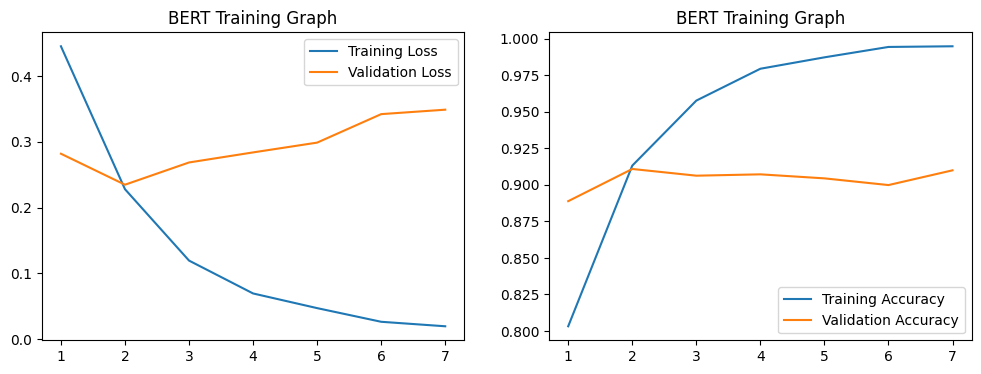

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2023-04-09 12:38:01.002665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:01.004091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:01.005144: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/12


2023-04-09 12:38:01.370461: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:01.371853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:01.372997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:01.941129: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:01.942580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:01.943695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus


 1/69 [..............................] - ETA: 1:52 - loss: 0.6839 - accuracy: 0.3750


 3/69 [>.............................] - ETA: 2s - loss: 0.6925 - accuracy: 0.5781  


 5/69 [=>............................] - ETA: 2s - loss: 0.6862 - accuracy: 0.6250


 7/69 [==>...........................] - ETA: 2s - loss: 0.6808 - accuracy: 0.6585


 9/69 [==>...........................] - ETA: 1s - loss: 0.6793 - accuracy: 0.6615


11/69 [===>..........................] - ETA: 1s - loss: 0.6741 - accuracy: 0.6747


13/69 [====>.........................] - ETA: 1s - loss: 0.6672 - accuracy: 0.6851


15/69 [=====>........................] - ETA: 1s - loss: 0.6651 - accuracy: 0.6823


17/69 [======>.......................] - ETA: 1s - loss: 0.6508 - accuracy: 0.6967


19/69 [=======>......................] - ETA: 1s - loss: 0.6408 - accuracy: 0.7023


21/69 [========>.....................] - ETA: 1s - loss: 0.6307 - accuracy: 0.7076


23/69 [=========>....................] - ETA: 1s - loss: 0.6286 - accuracy: 0.7058


25/69 [=========>....................] - ETA: 1s - loss: 0.6271 - accuracy: 0.7050


27/69 [==========>...................] - ETA: 1s - loss: 0.6185 - accuracy: 0.7112


29/69 [===========>..................] - ETA: 1s - loss: 0.6098 - accuracy: 0.7182


31/69 [============>.................] - ETA: 1s - loss: 0.6067 - accuracy: 0.7203


33/69 [=============>................] - ETA: 1s - loss: 0.6042 - accuracy: 0.7225


35/69 [==============>...............] - ETA: 1s - loss: 0.6015 - accuracy: 0.7250


37/69 [===============>..............] - ETA: 1s - loss: 0.5976 - accuracy: 0.7272


39/69 [===============>..............] - ETA: 0s - loss: 0.5956 - accuracy: 0.7284


41/69 [================>.............] - ETA: 0s - loss: 0.5956 - accuracy: 0.7275


43/69 [=================>............] - ETA: 0s - loss: 0.5927 - accuracy: 0.7304


45/69 [==================>...........] - ETA: 0s - loss: 0.5913 - accuracy: 0.7316


47/69 [===================>..........] - ETA: 0s - loss: 0.5925 - accuracy: 0.7304


49/69 [====================>.........] - ETA: 0s - loss: 0.5907 - accuracy: 0.7305


51/69 [=====================>........] - ETA: 0s - loss: 0.5897 - accuracy: 0.7307


53/69 [======================>.......] - ETA: 0s - loss: 0.5901 - accuracy: 0.7300


55/69 [======================>.......] - ETA: 0s - loss: 0.5895 - accuracy: 0.7310


57/69 [=======================>......] - ETA: 0s - loss: 0.5897 - accuracy: 0.7300


59/69 [========================>.....] - ETA: 0s - loss: 0.5904 - accuracy: 0.7296


61/69 [=========================>....] - ETA: 0s - loss: 0.5890 - accuracy: 0.7308


63/69 [==========================>...] - ETA: 0s - loss: 0.5895 - accuracy: 0.7294


65/69 [===========================>..] - ETA: 0s - loss: 0.5889 - accuracy: 0.7296


67/69 [============================>.] - ETA: 0s - loss: 0.5878 - accuracy: 0.7299

2023-04-09 12:38:05.229680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:05.231058: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:05.232111: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus


Epoch 1: val_accuracy improved from -inf to 0.74839, saving model to /home/ubuntu/h2o2.ai/src/models/sentiment_analysis/train/lstm_model


2023-04-09 12:38:05.857481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:05.858834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:05.859868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:06.213490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:06.214877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:06.215920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:06.418954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:06.420301: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:06.421357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:06.630654: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:06.631936: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:06.633005: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:07.016744: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:07.018049: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:07.019047: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:07.250459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs_0' with dtype float and shape [?,?,100]
	 [[{{node inputs_0}}]]
2023-04-09 12:38:07.257793: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs_0' with dtype float and shape [?,?,100]
	 [[{{node inputs_0}}]]
2023-04-09 12:38:07.264793: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,50,100]
	 [[{{node inputs}}]]
2

2023-04-09 12:38:07.592979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:07.594206: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:07.595201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:08.111467: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:08.112773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:08.113805: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:08.331445: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,16]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: /home/ubuntu/h2o2.ai/src/models/sentiment_analysis/train/lstm_model/assets


INFO:tensorflow:Assets written to: /home/ubuntu/h2o2.ai/src/models/sentiment_analysis/train/lstm_model/assets



69/69 [==============================] - 8s 88ms/step - loss: 0.5859 - accuracy: 0.7313 - val_loss: 0.6372 - val_accuracy: 0.7484


Epoch 2/12



 1/69 [..............................] - ETA: 2s - loss: 0.5971 - accuracy: 0.7500


 3/69 [>.............................] - ETA: 2s - loss: 0.5700 - accuracy: 0.7656


 5/69 [=>............................] - ETA: 2s - loss: 0.5785 - accuracy: 0.7563


 7/69 [==>...........................] - ETA: 1s - loss: 0.5747 - accuracy: 0.7589


 9/69 [==>...........................] - ETA: 1s - loss: 0.5841 - accuracy: 0.7465


11/69 [===>..........................] - ETA: 1s - loss: 0.5783 - accuracy: 0.7486


13/69 [====>.........................] - ETA: 1s - loss: 0.5613 - accuracy: 0.7584


15/69 [=====>........................] - ETA: 1s - loss: 0.5601 - accuracy: 0.7604


17/69 [======>.......................] - ETA: 1s - loss: 0.5634 - accuracy: 0.7574


19/69 [=======>......................] - ETA: 1s - loss: 0.5616 - accuracy: 0.7574


21/69 [========>.....................] - ETA: 1s - loss: 0.5628 - accuracy: 0.7560


23/69 [=========>....................] - ETA: 1s - loss: 0.5586 - accuracy: 0.7582


25/69 [=========>....................] - ETA: 1s - loss: 0.5646 - accuracy: 0.7519


27/69 [==========>...................] - ETA: 1s - loss: 0.5685 - accuracy: 0.7483


29/69 [===========>..................] - ETA: 1s - loss: 0.5682 - accuracy: 0.7457


31/69 [============>.................] - ETA: 1s - loss: 0.5678 - accuracy: 0.7460


33/69 [=============>................] - ETA: 1s - loss: 0.5704 - accuracy: 0.7420


35/69 [==============>...............] - ETA: 1s - loss: 0.5717 - accuracy: 0.7402


37/69 [===============>..............] - ETA: 1s - loss: 0.5713 - accuracy: 0.7390


39/69 [===============>..............] - ETA: 0s - loss: 0.5716 - accuracy: 0.7388


41/69 [================>.............] - ETA: 0s - loss: 0.5715 - accuracy: 0.7378


43/69 [=================>............] - ETA: 0s - loss: 0.5701 - accuracy: 0.7398


45/69 [==================>...........] - ETA: 0s - loss: 0.5699 - accuracy: 0.7399


47/69 [===================>..........] - ETA: 0s - loss: 0.5683 - accuracy: 0.7417


49/69 [====================>.........] - ETA: 0s - loss: 0.5671 - accuracy: 0.7430


51/69 [=====================>........] - ETA: 0s - loss: 0.5652 - accuracy: 0.7451


53/69 [======================>.......] - ETA: 0s - loss: 0.5668 - accuracy: 0.7438


55/69 [======================>.......] - ETA: 0s - loss: 0.5672 - accuracy: 0.7423


57/69 [=======================>......] - ETA: 0s - loss: 0.5678 - accuracy: 0.7412


59/69 [========================>.....] - ETA: 0s - loss: 0.5684 - accuracy: 0.7394


61/69 [=========================>....] - ETA: 0s - loss: 0.5684 - accuracy: 0.7392


63/69 [==========================>...] - ETA: 0s - loss: 0.5705 - accuracy: 0.7371


65/69 [===========================>..] - ETA: 0s - loss: 0.5714 - accuracy: 0.7370


67/69 [============================>.] - ETA: 0s - loss: 0.5713 - accuracy: 0.7374


Epoch 2: val_accuracy did not improve from 0.74839



69/69 [==============================] - 2s 35ms/step - loss: 0.5705 - accuracy: 0.7380 - val_loss: 0.5538 - val_accuracy: 0.7484


Epoch 3/12



 1/69 [..............................] - ETA: 2s - loss: 0.6225 - accuracy: 0.6875


 3/69 [>.............................] - ETA: 2s - loss: 0.5688 - accuracy: 0.7396


 5/69 [=>............................] - ETA: 2s - loss: 0.5569 - accuracy: 0.7500


 7/69 [==>...........................] - ETA: 2s - loss: 0.5558 - accuracy: 0.7478


 9/69 [==>...........................] - ETA: 1s - loss: 0.5547 - accuracy: 0.7500


11/69 [===>..........................] - ETA: 1s - loss: 0.5611 - accuracy: 0.7500


13/69 [====>.........................] - ETA: 1s - loss: 0.5758 - accuracy: 0.7392


15/69 [=====>........................] - ETA: 1s - loss: 0.5722 - accuracy: 0.7385


17/69 [======>.......................] - ETA: 1s - loss: 0.5650 - accuracy: 0.7417


19/69 [=======>......................] - ETA: 1s - loss: 0.5620 - accuracy: 0.7434


21/69 [========>.....................] - ETA: 1s - loss: 0.5608 - accuracy: 0.7440


23/69 [=========>....................] - ETA: 1s - loss: 0.5641 - accuracy: 0.7385


25/69 [=========>....................] - ETA: 1s - loss: 0.5566 - accuracy: 0.7450


27/69 [==========>...................] - ETA: 1s - loss: 0.5498 - accuracy: 0.7500


29/69 [===========>..................] - ETA: 1s - loss: 0.5528 - accuracy: 0.7468


31/69 [============>.................] - ETA: 1s - loss: 0.5582 - accuracy: 0.7424


33/69 [=============>................] - ETA: 1s - loss: 0.5569 - accuracy: 0.7443


35/69 [==============>...............] - ETA: 1s - loss: 0.5563 - accuracy: 0.7455


37/69 [===============>..............] - ETA: 1s - loss: 0.5563 - accuracy: 0.7454


39/69 [===============>..............] - ETA: 0s - loss: 0.5576 - accuracy: 0.7456


41/69 [================>.............] - ETA: 0s - loss: 0.5603 - accuracy: 0.7439


43/69 [=================>............] - ETA: 0s - loss: 0.5615 - accuracy: 0.7431


45/69 [==================>...........] - ETA: 0s - loss: 0.5627 - accuracy: 0.7413


47/69 [===================>..........] - ETA: 0s - loss: 0.5610 - accuracy: 0.7414


49/69 [====================>.........] - ETA: 0s - loss: 0.5601 - accuracy: 0.7427


51/69 [=====================>........] - ETA: 0s - loss: 0.5605 - accuracy: 0.7423


53/69 [======================>.......] - ETA: 0s - loss: 0.5607 - accuracy: 0.7415


55/69 [======================>.......] - ETA: 0s - loss: 0.5619 - accuracy: 0.7398


57/69 [=======================>......] - ETA: 0s - loss: 0.5624 - accuracy: 0.7396


59/69 [========================>.....] - ETA: 0s - loss: 0.5632 - accuracy: 0.7394


61/69 [=========================>....] - ETA: 0s - loss: 0.5632 - accuracy: 0.7398


63/69 [==========================>...] - ETA: 0s - loss: 0.5649 - accuracy: 0.7388


65/69 [===========================>..] - ETA: 0s - loss: 0.5628 - accuracy: 0.7401


67/69 [============================>.] - ETA: 0s - loss: 0.5643 - accuracy: 0.7393


Epoch 3: val_accuracy did not improve from 0.74839



69/69 [==============================] - 2s 35ms/step - loss: 0.5661 - accuracy: 0.7382 - val_loss: 0.5449 - val_accuracy: 0.7484


Epoch 4/12



 1/69 [..............................] - ETA: 2s - loss: 0.5820 - accuracy: 0.7188


 3/69 [>.............................] - ETA: 2s - loss: 0.5844 - accuracy: 0.7240


 5/69 [=>............................] - ETA: 2s - loss: 0.5554 - accuracy: 0.7469


 7/69 [==>...........................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7522


 9/69 [==>...........................] - ETA: 1s - loss: 0.5385 - accuracy: 0.7483


11/69 [===>..........................] - ETA: 1s - loss: 0.5346 - accuracy: 0.7514


13/69 [====>.........................] - ETA: 1s - loss: 0.5418 - accuracy: 0.7452


15/69 [=====>........................] - ETA: 1s - loss: 0.5440 - accuracy: 0.7417


17/69 [======>.......................] - ETA: 1s - loss: 0.5550 - accuracy: 0.7344


19/69 [=======>......................] - ETA: 1s - loss: 0.5582 - accuracy: 0.7352


21/69 [========>.....................] - ETA: 1s - loss: 0.5543 - accuracy: 0.7359


23/69 [=========>....................] - ETA: 1s - loss: 0.5561 - accuracy: 0.7351


25/69 [=========>....................] - ETA: 1s - loss: 0.5578 - accuracy: 0.7350


27/69 [==========>...................] - ETA: 1s - loss: 0.5549 - accuracy: 0.7361


29/69 [===========>..................] - ETA: 1s - loss: 0.5487 - accuracy: 0.7408


31/69 [============>.................] - ETA: 1s - loss: 0.5459 - accuracy: 0.7429


33/69 [=============>................] - ETA: 1s - loss: 0.5449 - accuracy: 0.7415


35/69 [==============>...............] - ETA: 1s - loss: 0.5485 - accuracy: 0.7384


37/69 [===============>..............] - ETA: 1s - loss: 0.5494 - accuracy: 0.7382


39/69 [===============>..............] - ETA: 0s - loss: 0.5477 - accuracy: 0.7392


41/69 [================>.............] - ETA: 0s - loss: 0.5483 - accuracy: 0.7397


43/69 [=================>............] - ETA: 0s - loss: 0.5481 - accuracy: 0.7391


45/69 [==================>...........] - ETA: 0s - loss: 0.5497 - accuracy: 0.7382


47/69 [===================>..........] - ETA: 0s - loss: 0.5508 - accuracy: 0.7394


49/69 [====================>.........] - ETA: 0s - loss: 0.5515 - accuracy: 0.7385


51/69 [=====================>........] - ETA: 0s - loss: 0.5513 - accuracy: 0.7384


53/69 [======================>.......] - ETA: 0s - loss: 0.5482 - accuracy: 0.7400


55/69 [======================>.......] - ETA: 0s - loss: 0.5482 - accuracy: 0.7406


57/69 [=======================>......] - ETA: 0s - loss: 0.5447 - accuracy: 0.7434


59/69 [========================>.....] - ETA: 0s - loss: 0.5462 - accuracy: 0.7399


61/69 [=========================>....] - ETA: 0s - loss: 0.5441 - accuracy: 0.7421


63/69 [==========================>...] - ETA: 0s - loss: 0.5464 - accuracy: 0.7398


65/69 [===========================>..] - ETA: 0s - loss: 0.5474 - accuracy: 0.7382


67/69 [============================>.] - ETA: 0s - loss: 0.5484 - accuracy: 0.7369


Epoch 4: val_accuracy improved from 0.74839 to 0.75207, saving model to /home/ubuntu/h2o2.ai/src/models/sentiment_analysis/train/lstm_model


2023-04-09 12:38:16.259326: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:16.260806: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:16.261896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:16.620604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:16.621972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:16.623018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:16.825119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:16.826477: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:16.827555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:17.035017: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:17.036347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:17.037419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:17.396595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:17.397911: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:17.398959: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:17.635095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs_0' with dtype float and shape [?,?,100]
	 [[{{node inputs_0}}]]
2023-04-09 12:38:17.642523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs_0' with dtype float and shape [?,?,100]
	 [[{{node inputs_0}}]]
2023-04-09 12:38:17.649598: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,50,100]
	 [[{{node inputs}}]]
2

2023-04-09 12:38:17.982422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:17.983710: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:17.984757: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:18.325309: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:18.326651: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:18.327685: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

INFO:tensorflow:Assets written to: /home/ubuntu/h2o2.ai/src/models/sentiment_analysis/train/lstm_model/assets


INFO:tensorflow:Assets written to: /home/ubuntu/h2o2.ai/src/models/sentiment_analysis/train/lstm_model/assets



69/69 [==============================] - 5s 76ms/step - loss: 0.5485 - accuracy: 0.7378 - val_loss: 0.5542 - val_accuracy: 0.7521


Epoch 5/12



 1/69 [..............................] - ETA: 2s - loss: 0.5455 - accuracy: 0.7656


 3/69 [>.............................] - ETA: 2s - loss: 0.5345 - accuracy: 0.7708


 5/69 [=>............................] - ETA: 2s - loss: 0.5452 - accuracy: 0.7406


 7/69 [==>...........................] - ETA: 1s - loss: 0.5499 - accuracy: 0.7299


 9/69 [==>...........................] - ETA: 1s - loss: 0.5399 - accuracy: 0.7378


11/69 [===>..........................] - ETA: 1s - loss: 0.5353 - accuracy: 0.7429


13/69 [====>.........................] - ETA: 1s - loss: 0.5345 - accuracy: 0.7536


15/69 [=====>........................] - ETA: 1s - loss: 0.5290 - accuracy: 0.7583


17/69 [======>.......................] - ETA: 1s - loss: 0.5324 - accuracy: 0.7546


19/69 [=======>......................] - ETA: 1s - loss: 0.5394 - accuracy: 0.7492


21/69 [========>.....................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7493


23/69 [=========>....................] - ETA: 1s - loss: 0.5352 - accuracy: 0.7500


25/69 [=========>....................] - ETA: 1s - loss: 0.5322 - accuracy: 0.7531


27/69 [==========>...................] - ETA: 1s - loss: 0.5386 - accuracy: 0.7500


29/69 [===========>..................] - ETA: 1s - loss: 0.5442 - accuracy: 0.7484


31/69 [============>.................] - ETA: 1s - loss: 0.5429 - accuracy: 0.7495


33/69 [=============>................] - ETA: 1s - loss: 0.5419 - accuracy: 0.7491


35/69 [==============>...............] - ETA: 1s - loss: 0.5408 - accuracy: 0.7504


37/69 [===============>..............] - ETA: 1s - loss: 0.5413 - accuracy: 0.7504


39/69 [===============>..............] - ETA: 0s - loss: 0.5438 - accuracy: 0.7456


41/69 [================>.............] - ETA: 0s - loss: 0.5410 - accuracy: 0.7462


43/69 [=================>............] - ETA: 0s - loss: 0.5395 - accuracy: 0.7482


45/69 [==================>...........] - ETA: 0s - loss: 0.5407 - accuracy: 0.7451


47/69 [===================>..........] - ETA: 0s - loss: 0.5425 - accuracy: 0.7424


49/69 [====================>.........] - ETA: 0s - loss: 0.5383 - accuracy: 0.7459


51/69 [=====================>........] - ETA: 0s - loss: 0.5372 - accuracy: 0.7472


53/69 [======================>.......] - ETA: 0s - loss: 0.5379 - accuracy: 0.7465


55/69 [======================>.......] - ETA: 0s - loss: 0.5368 - accuracy: 0.7480


57/69 [=======================>......] - ETA: 0s - loss: 0.5390 - accuracy: 0.7481


59/69 [========================>.....] - ETA: 0s - loss: 0.5366 - accuracy: 0.7481


61/69 [=========================>....] - ETA: 0s - loss: 0.5353 - accuracy: 0.7492


63/69 [==========================>...] - ETA: 0s - loss: 0.5354 - accuracy: 0.7485


65/69 [===========================>..] - ETA: 0s - loss: 0.5354 - accuracy: 0.7481


67/69 [============================>.] - ETA: 0s - loss: 0.5337 - accuracy: 0.7486


Epoch 5: val_accuracy did not improve from 0.75207



69/69 [==============================] - 2s 35ms/step - loss: 0.5320 - accuracy: 0.7481 - val_loss: 0.5177 - val_accuracy: 0.7466


Epoch 6/12



 1/69 [..............................] - ETA: 2s - loss: 0.4977 - accuracy: 0.7656


 3/69 [>.............................] - ETA: 2s - loss: 0.5684 - accuracy: 0.7083


 5/69 [=>............................] - ETA: 2s - loss: 0.5162 - accuracy: 0.7375


 7/69 [==>...........................] - ETA: 1s - loss: 0.5039 - accuracy: 0.7500


 9/69 [==>...........................] - ETA: 1s - loss: 0.5021 - accuracy: 0.7535


11/69 [===>..........................] - ETA: 1s - loss: 0.5036 - accuracy: 0.7486


13/69 [====>.........................] - ETA: 1s - loss: 0.4979 - accuracy: 0.7536


15/69 [=====>........................] - ETA: 1s - loss: 0.4943 - accuracy: 0.7521


17/69 [======>.......................] - ETA: 1s - loss: 0.4971 - accuracy: 0.7564


19/69 [=======>......................] - ETA: 1s - loss: 0.4999 - accuracy: 0.7549


21/69 [========>.....................] - ETA: 1s - loss: 0.5019 - accuracy: 0.7567


23/69 [=========>....................] - ETA: 1s - loss: 0.5068 - accuracy: 0.7541


25/69 [=========>....................] - ETA: 1s - loss: 0.5063 - accuracy: 0.7538


27/69 [==========>...................] - ETA: 1s - loss: 0.5065 - accuracy: 0.7546


29/69 [===========>..................] - ETA: 1s - loss: 0.5033 - accuracy: 0.7570


31/69 [============>.................] - ETA: 1s - loss: 0.5031 - accuracy: 0.7576


33/69 [=============>................] - ETA: 1s - loss: 0.5017 - accuracy: 0.7599


35/69 [==============>...............] - ETA: 1s - loss: 0.4952 - accuracy: 0.7647


37/69 [===============>..............] - ETA: 1s - loss: 0.4953 - accuracy: 0.7660


39/69 [===============>..............] - ETA: 0s - loss: 0.4997 - accuracy: 0.7612


41/69 [================>.............] - ETA: 0s - loss: 0.4973 - accuracy: 0.7626


43/69 [=================>............] - ETA: 0s - loss: 0.4944 - accuracy: 0.7656


45/69 [==================>...........] - ETA: 0s - loss: 0.4933 - accuracy: 0.7656


47/69 [===================>..........] - ETA: 0s - loss: 0.4945 - accuracy: 0.7660


49/69 [====================>.........] - ETA: 0s - loss: 0.4961 - accuracy: 0.7624


51/69 [=====================>........] - ETA: 0s - loss: 0.4955 - accuracy: 0.7635


53/69 [======================>.......] - ETA: 0s - loss: 0.4950 - accuracy: 0.7633


55/69 [======================>.......] - ETA: 0s - loss: 0.4945 - accuracy: 0.7636


57/69 [=======================>......] - ETA: 0s - loss: 0.4891 - accuracy: 0.7673


59/69 [========================>.....] - ETA: 0s - loss: 0.4867 - accuracy: 0.7683


61/69 [=========================>....] - ETA: 0s - loss: 0.4875 - accuracy: 0.7669


63/69 [==========================>...] - ETA: 0s - loss: 0.4892 - accuracy: 0.7686


65/69 [===========================>..] - ETA: 0s - loss: 0.4906 - accuracy: 0.7673


67/69 [============================>.] - ETA: 0s - loss: 0.4885 - accuracy: 0.7687


Epoch 6: val_accuracy improved from 0.75207 to 0.78788, saving model to /home/ubuntu/h2o2.ai/src/models/sentiment_analysis/train/lstm_model


2023-04-09 12:38:23.862569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:23.864042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:23.865150: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:24.226471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:24.227809: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:24.228896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:24.432781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:24.434107: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:24.435183: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:24.644996: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:24.646310: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:24.647431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:25.009754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:25.011085: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:25.012201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:25.249842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs_0' with dtype float and shape [?,?,100]
	 [[{{node inputs_0}}]]
2023-04-09 12:38:25.257295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs_0' with dtype float and shape [?,?,100]
	 [[{{node inputs_0}}]]
2023-04-09 12:38:25.264480: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,50,100]
	 [[{{node inputs}}]]
2

2023-04-09 12:38:25.600150: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:25.601513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:25.602576: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:25.946636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:25.947949: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:25.949026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

INFO:tensorflow:Assets written to: /home/ubuntu/h2o2.ai/src/models/sentiment_analysis/train/lstm_model/assets


INFO:tensorflow:Assets written to: /home/ubuntu/h2o2.ai/src/models/sentiment_analysis/train/lstm_model/assets



69/69 [==============================] - 5s 76ms/step - loss: 0.4883 - accuracy: 0.7697 - val_loss: 0.4722 - val_accuracy: 0.7879


Epoch 7/12



 1/69 [..............................] - ETA: 2s - loss: 0.5038 - accuracy: 0.7656


 3/69 [>.............................] - ETA: 2s - loss: 0.4424 - accuracy: 0.8229


 5/69 [=>............................] - ETA: 2s - loss: 0.3888 - accuracy: 0.8469


 7/69 [==>...........................] - ETA: 2s - loss: 0.4078 - accuracy: 0.8170


 9/69 [==>...........................] - ETA: 1s - loss: 0.4170 - accuracy: 0.8056


11/69 [===>..........................] - ETA: 1s - loss: 0.4227 - accuracy: 0.8068


13/69 [====>.........................] - ETA: 1s - loss: 0.4605 - accuracy: 0.7981


15/69 [=====>........................] - ETA: 1s - loss: 0.4577 - accuracy: 0.8000


17/69 [======>.......................] - ETA: 1s - loss: 0.4520 - accuracy: 0.8015


19/69 [=======>......................] - ETA: 1s - loss: 0.4426 - accuracy: 0.8067


21/69 [========>.....................] - ETA: 1s - loss: 0.4367 - accuracy: 0.8058


23/69 [=========>....................] - ETA: 1s - loss: 0.4301 - accuracy: 0.8105


25/69 [=========>....................] - ETA: 1s - loss: 0.4317 - accuracy: 0.8069


27/69 [==========>...................] - ETA: 1s - loss: 0.4281 - accuracy: 0.8119


29/69 [===========>..................] - ETA: 1s - loss: 0.4307 - accuracy: 0.8071


31/69 [============>.................] - ETA: 1s - loss: 0.4334 - accuracy: 0.8075


33/69 [=============>................] - ETA: 1s - loss: 0.4273 - accuracy: 0.8125


35/69 [==============>...............] - ETA: 1s - loss: 0.4345 - accuracy: 0.8125


37/69 [===============>..............] - ETA: 1s - loss: 0.4335 - accuracy: 0.8129


39/69 [===============>..............] - ETA: 0s - loss: 0.4348 - accuracy: 0.8117


41/69 [================>.............] - ETA: 0s - loss: 0.4364 - accuracy: 0.8114


43/69 [=================>............] - ETA: 0s - loss: 0.4355 - accuracy: 0.8107


45/69 [==================>...........] - ETA: 0s - loss: 0.4407 - accuracy: 0.8056


47/69 [===================>..........] - ETA: 0s - loss: 0.4392 - accuracy: 0.8049


49/69 [====================>.........] - ETA: 0s - loss: 0.4379 - accuracy: 0.8061


51/69 [=====================>........] - ETA: 0s - loss: 0.4362 - accuracy: 0.8073


53/69 [======================>.......] - ETA: 0s - loss: 0.4367 - accuracy: 0.8057


55/69 [======================>.......] - ETA: 0s - loss: 0.4332 - accuracy: 0.8077


57/69 [=======================>......] - ETA: 0s - loss: 0.4318 - accuracy: 0.8089


59/69 [========================>.....] - ETA: 0s - loss: 0.4325 - accuracy: 0.8091


61/69 [=========================>....] - ETA: 0s - loss: 0.4324 - accuracy: 0.8105


63/69 [==========================>...] - ETA: 0s - loss: 0.4299 - accuracy: 0.8105


65/69 [===========================>..] - ETA: 0s - loss: 0.4338 - accuracy: 0.8099


67/69 [============================>.] - ETA: 0s - loss: 0.4337 - accuracy: 0.8104


Epoch 7: val_accuracy improved from 0.78788 to 0.83379, saving model to /home/ubuntu/h2o2.ai/src/models/sentiment_analysis/train/lstm_model


2023-04-09 12:38:29.112473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:29.113919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:29.114948: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:29.467813: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:29.469176: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:29.470213: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:29.670977: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:29.672318: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:29.673384: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:29.879559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:29.880875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:29.881969: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:30.238089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:30.239379: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:30.241313: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:30.472935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs_0' with dtype float and shape [?,?,100]
	 [[{{node inputs_0}}]]
2023-04-09 12:38:30.480277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs_0' with dtype float and shape [?,?,100]
	 [[{{node inputs_0}}]]
2023-04-09 12:38:30.487454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,50,100]
	 [[{{node inputs}}]]
2

2023-04-09 12:38:30.817190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:30.818506: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:30.819508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:31.159211: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:31.160648: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:31.161704: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

INFO:tensorflow:Assets written to: /home/ubuntu/h2o2.ai/src/models/sentiment_analysis/train/lstm_model/assets


INFO:tensorflow:Assets written to: /home/ubuntu/h2o2.ai/src/models/sentiment_analysis/train/lstm_model/assets



69/69 [==============================] - 5s 76ms/step - loss: 0.4350 - accuracy: 0.8087 - val_loss: 0.3860 - val_accuracy: 0.8338


Epoch 8/12



 1/69 [..............................] - ETA: 2s - loss: 0.3521 - accuracy: 0.8594


 3/69 [>.............................] - ETA: 2s - loss: 0.4905 - accuracy: 0.8073


 5/69 [=>............................] - ETA: 2s - loss: 0.4544 - accuracy: 0.8062


 7/69 [==>...........................] - ETA: 1s - loss: 0.4381 - accuracy: 0.8237


 9/69 [==>...........................] - ETA: 1s - loss: 0.4225 - accuracy: 0.8264


11/69 [===>..........................] - ETA: 1s - loss: 0.4339 - accuracy: 0.8068


13/69 [====>.........................] - ETA: 1s - loss: 0.4273 - accuracy: 0.8113


15/69 [=====>........................] - ETA: 1s - loss: 0.4212 - accuracy: 0.8146


17/69 [======>.......................] - ETA: 1s - loss: 0.4132 - accuracy: 0.8199


19/69 [=======>......................] - ETA: 1s - loss: 0.4089 - accuracy: 0.8240


21/69 [========>.....................] - ETA: 1s - loss: 0.4261 - accuracy: 0.8058


23/69 [=========>....................] - ETA: 1s - loss: 0.4193 - accuracy: 0.8125


25/69 [=========>....................] - ETA: 1s - loss: 0.4096 - accuracy: 0.8175


27/69 [==========>...................] - ETA: 1s - loss: 0.4064 - accuracy: 0.8212


29/69 [===========>..................] - ETA: 1s - loss: 0.4086 - accuracy: 0.8173


31/69 [============>.................] - ETA: 1s - loss: 0.4033 - accuracy: 0.8196


33/69 [=============>................] - ETA: 1s - loss: 0.4056 - accuracy: 0.8153


35/69 [==============>...............] - ETA: 1s - loss: 0.4037 - accuracy: 0.8188


37/69 [===============>..............] - ETA: 1s - loss: 0.4077 - accuracy: 0.8188


39/69 [===============>..............] - ETA: 0s - loss: 0.4011 - accuracy: 0.8241


41/69 [================>.............] - ETA: 0s - loss: 0.4041 - accuracy: 0.8216


43/69 [=================>............] - ETA: 0s - loss: 0.4098 - accuracy: 0.8194


45/69 [==================>...........] - ETA: 0s - loss: 0.4067 - accuracy: 0.8215


47/69 [===================>..........] - ETA: 0s - loss: 0.4009 - accuracy: 0.8248


49/69 [====================>.........] - ETA: 0s - loss: 0.4002 - accuracy: 0.8262


51/69 [=====================>........] - ETA: 0s - loss: 0.3960 - accuracy: 0.8281


53/69 [======================>.......] - ETA: 0s - loss: 0.3942 - accuracy: 0.8296


55/69 [======================>.......] - ETA: 0s - loss: 0.3904 - accuracy: 0.8324


57/69 [=======================>......] - ETA: 0s - loss: 0.3912 - accuracy: 0.8317


59/69 [========================>.....] - ETA: 0s - loss: 0.3884 - accuracy: 0.8329


61/69 [=========================>....] - ETA: 0s - loss: 0.3870 - accuracy: 0.8348


63/69 [==========================>...] - ETA: 0s - loss: 0.3847 - accuracy: 0.8366


65/69 [===========================>..] - ETA: 0s - loss: 0.3872 - accuracy: 0.8346


67/69 [============================>.] - ETA: 0s - loss: 0.3880 - accuracy: 0.8337


Epoch 8: val_accuracy did not improve from 0.83379



69/69 [==============================] - 2s 35ms/step - loss: 0.3878 - accuracy: 0.8338 - val_loss: 0.5344 - val_accuracy: 0.7961


Epoch 9/12



 1/69 [..............................] - ETA: 2s - loss: 0.5859 - accuracy: 0.8125


 3/69 [>.............................] - ETA: 2s - loss: 0.3882 - accuracy: 0.8750


 5/69 [=>............................] - ETA: 2s - loss: 0.3872 - accuracy: 0.8531


 7/69 [==>...........................] - ETA: 1s - loss: 0.3622 - accuracy: 0.8571


 9/69 [==>...........................] - ETA: 1s - loss: 0.3569 - accuracy: 0.8559


11/69 [===>..........................] - ETA: 1s - loss: 0.3430 - accuracy: 0.8622


13/69 [====>.........................] - ETA: 1s - loss: 0.3436 - accuracy: 0.8606


15/69 [=====>........................] - ETA: 1s - loss: 0.3584 - accuracy: 0.8615


17/69 [======>.......................] - ETA: 1s - loss: 0.3529 - accuracy: 0.8649


19/69 [=======>......................] - ETA: 1s - loss: 0.3481 - accuracy: 0.8676


21/69 [========>.....................] - ETA: 1s - loss: 0.3555 - accuracy: 0.8601


23/69 [=========>....................] - ETA: 1s - loss: 0.3480 - accuracy: 0.8628


25/69 [=========>....................] - ETA: 1s - loss: 0.3447 - accuracy: 0.8644


27/69 [==========>...................] - ETA: 1s - loss: 0.3499 - accuracy: 0.8634


29/69 [===========>..................] - ETA: 1s - loss: 0.3445 - accuracy: 0.8669


31/69 [============>.................] - ETA: 1s - loss: 0.3428 - accuracy: 0.8669


33/69 [=============>................] - ETA: 1s - loss: 0.3400 - accuracy: 0.8684


35/69 [==============>...............] - ETA: 1s - loss: 0.3352 - accuracy: 0.8714


37/69 [===============>..............] - ETA: 1s - loss: 0.3368 - accuracy: 0.8691


39/69 [===============>..............] - ETA: 0s - loss: 0.3392 - accuracy: 0.8678


41/69 [================>.............] - ETA: 0s - loss: 0.3376 - accuracy: 0.8693


43/69 [=================>............] - ETA: 0s - loss: 0.3382 - accuracy: 0.8681


45/69 [==================>...........] - ETA: 0s - loss: 0.3441 - accuracy: 0.8632


47/69 [===================>..........] - ETA: 0s - loss: 0.3440 - accuracy: 0.8647


49/69 [====================>.........] - ETA: 0s - loss: 0.3399 - accuracy: 0.8677


51/69 [=====================>........] - ETA: 0s - loss: 0.3382 - accuracy: 0.8680


53/69 [======================>.......] - ETA: 0s - loss: 0.3339 - accuracy: 0.8694


55/69 [======================>.......] - ETA: 0s - loss: 0.3375 - accuracy: 0.8673


57/69 [=======================>......] - ETA: 0s - loss: 0.3375 - accuracy: 0.8660


59/69 [========================>.....] - ETA: 0s - loss: 0.3358 - accuracy: 0.8673


61/69 [=========================>....] - ETA: 0s - loss: 0.3375 - accuracy: 0.8642


63/69 [==========================>...] - ETA: 0s - loss: 0.3371 - accuracy: 0.8653


65/69 [===========================>..] - ETA: 0s - loss: 0.3379 - accuracy: 0.8627


67/69 [============================>.] - ETA: 0s - loss: 0.3379 - accuracy: 0.8626


Epoch 9: val_accuracy did not improve from 0.83379



69/69 [==============================] - 2s 35ms/step - loss: 0.3371 - accuracy: 0.8636 - val_loss: 0.9121 - val_accuracy: 0.4839


Epoch 10/12



 1/69 [..............................] - ETA: 2s - loss: 0.8999 - accuracy: 0.5000


 3/69 [>.............................] - ETA: 2s - loss: 0.4543 - accuracy: 0.7760


 5/69 [=>............................] - ETA: 2s - loss: 0.3867 - accuracy: 0.8219


 7/69 [==>...........................] - ETA: 1s - loss: 0.3563 - accuracy: 0.8348


 9/69 [==>...........................] - ETA: 1s - loss: 0.3281 - accuracy: 0.8594


11/69 [===>..........................] - ETA: 1s - loss: 0.3202 - accuracy: 0.8693


13/69 [====>.........................] - ETA: 1s - loss: 0.3456 - accuracy: 0.8462


15/69 [=====>........................] - ETA: 1s - loss: 0.3466 - accuracy: 0.8510


17/69 [======>.......................] - ETA: 1s - loss: 0.3414 - accuracy: 0.8566


19/69 [=======>......................] - ETA: 1s - loss: 0.3293 - accuracy: 0.8651


21/69 [========>.....................] - ETA: 1s - loss: 0.3282 - accuracy: 0.8653


23/69 [=========>....................] - ETA: 1s - loss: 0.3194 - accuracy: 0.8709


25/69 [=========>....................] - ETA: 1s - loss: 0.3176 - accuracy: 0.8700


27/69 [==========>...................] - ETA: 1s - loss: 0.3228 - accuracy: 0.8675


29/69 [===========>..................] - ETA: 1s - loss: 0.3236 - accuracy: 0.8685


31/69 [============>.................] - ETA: 1s - loss: 0.3179 - accuracy: 0.8720


33/69 [=============>................] - ETA: 1s - loss: 0.3128 - accuracy: 0.8741


35/69 [==============>...............] - ETA: 1s - loss: 0.3075 - accuracy: 0.8763


37/69 [===============>..............] - ETA: 1s - loss: 0.3044 - accuracy: 0.8792


39/69 [===============>..............] - ETA: 0s - loss: 0.3076 - accuracy: 0.8786


41/69 [================>.............] - ETA: 0s - loss: 0.3102 - accuracy: 0.8758


43/69 [=================>............] - ETA: 0s - loss: 0.3069 - accuracy: 0.8775


45/69 [==================>...........] - ETA: 0s - loss: 0.3038 - accuracy: 0.8788


47/69 [===================>..........] - ETA: 0s - loss: 0.3049 - accuracy: 0.8793


49/69 [====================>.........] - ETA: 0s - loss: 0.3021 - accuracy: 0.8801


51/69 [=====================>........] - ETA: 0s - loss: 0.2987 - accuracy: 0.8820


53/69 [======================>.......] - ETA: 0s - loss: 0.3001 - accuracy: 0.8818


55/69 [======================>.......] - ETA: 0s - loss: 0.2972 - accuracy: 0.8838


57/69 [=======================>......] - ETA: 0s - loss: 0.3003 - accuracy: 0.8821


59/69 [========================>.....] - ETA: 0s - loss: 0.2989 - accuracy: 0.8827


61/69 [=========================>....] - ETA: 0s - loss: 0.3001 - accuracy: 0.8832


63/69 [==========================>...] - ETA: 0s - loss: 0.2960 - accuracy: 0.8857


65/69 [===========================>..] - ETA: 0s - loss: 0.2911 - accuracy: 0.8877


67/69 [============================>.] - ETA: 0s - loss: 0.2995 - accuracy: 0.8822


Epoch 10: val_accuracy did not improve from 0.83379



69/69 [==============================] - 2s 35ms/step - loss: 0.2994 - accuracy: 0.8820 - val_loss: 0.5466 - val_accuracy: 0.6722


Epoch 10: early stopping


<Figure size 640x480 with 0 Axes>

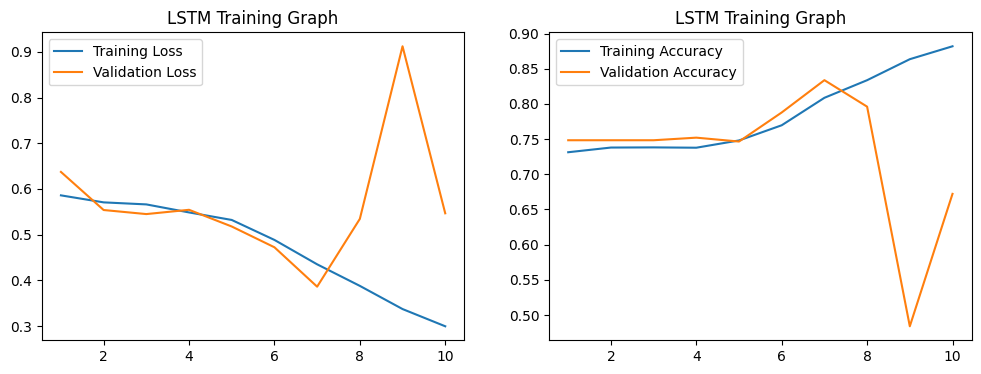

2023-04-09 12:38:39.515730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2023-04-09 12:38:39.515838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_grad_concat_split_split_dim' with dtype int32
	 [[{{node gradients_split_grad_concat_split_split_dim}}]]
2023-04-09 12:38:39.515910: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:39.725430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2023-04-09 12:38:39.725527: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_grad_concat_split_split_dim' with dtype int32
	 [[{{node gradients_split_grad_concat_split_split_dim}}]]
2023-04-09 12:38:39.725601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:40.575149: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2023-04-09 12:38:40.575265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_grad_concat_split_split_dim' with dtype int32
	 [[{{node gradients_split_grad_concat_split_split_dim}}]]
2023-04-09 12:38:40.575338: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-09 12:38:41.158609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:41.159932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:41.160962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus


 1/35 [..............................] - ETA: 11s

2023-04-09 12:38:41.436648: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 12:38:41.437961: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 12:38:41.438975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus


 7/35 [=====>........................] - ETA: 0s 


14/35 [===========>..................] - ETA: 0s


21/35 [=================>............] - ETA: 0s


28/35 [=======================>......] - ETA: 0s


35/35 [==============================] - 1s 8ms/step


In [ ]:
sentiment_analysis_train()

## Evaluation

bert_training.png:


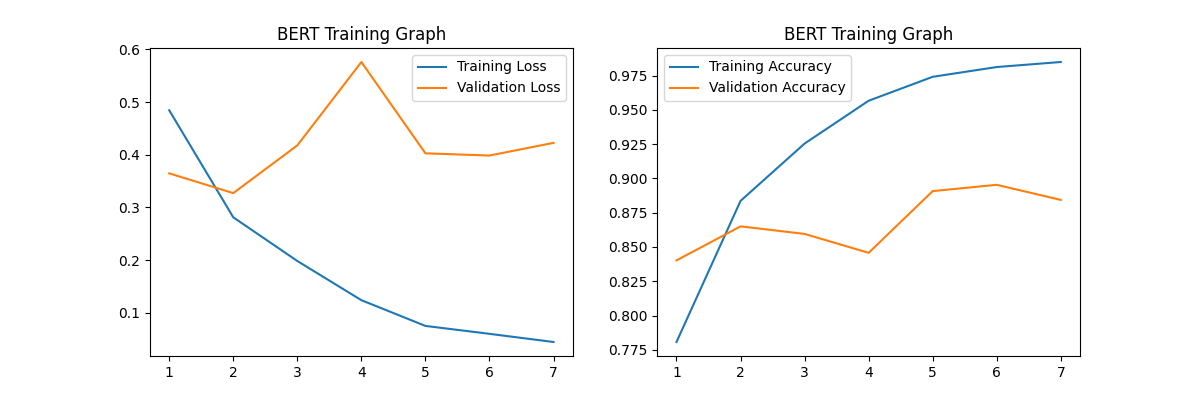

lstm_training_graph.png:


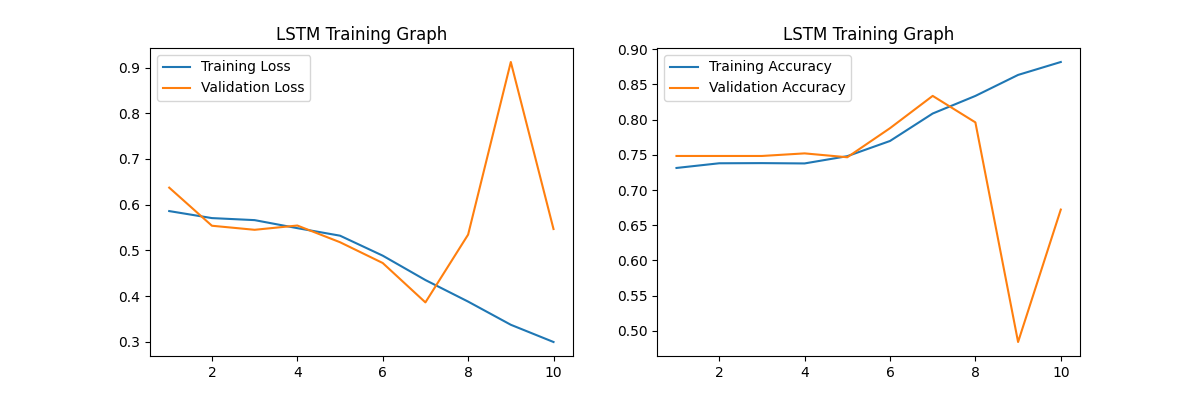

In [ ]:
file_util.get_sentiment_viz_png()

To evaluate model performances amongst imbalanced data, we focused on the following metrics, output in "eval" folder under "metrics.json":
1. Average Precision Score
2. PR-AUC Score

**FileUtil.get_metrics** function will retrieve these saved metrics.

BERT performs a bit better than LSTM here. However, the LSTM model is unstable. Sometimes LSTM PR AUC and Average Precision are far worse than BERT (< 90%).

In [ ]:
metrics = file_util.get_metrics("sentiment_analysis")
metrics

{'BERT': {'PR AUC': 0.9869342521024607,
  'Average Precision': 0.9869425235197311},
 'LSTM': {'PR AUC': 0.9501410222528646,
  'Average Precision': 0.9501812850296188},
 'LOGREG': {'PR AUC': 0.862126674769384,
  'Average Precision': 0.86240477142699}}

In [ ]:
models_prauc = sorted(list(map(lambda item: (item[0], item[1]["PR AUC"]), metrics.items())), key = lambda x: x[1])
print("Best model is {} with PR-AUC {}".format(models_prauc[-1][0], models_prauc[-1][1]))

Best model is BERT with PR-AUC 0.9869342521024607


# Topic Modelling

## Training

**Goal: Identify topics relevant to our use case.**

Models:
1. Non-negative Matrix Factorization (NMF) with Tf-Idf vectorization
2. Latent Dirichlet Allocation (LDA) with Bag of Words vectorization
3. BERTopic

Takes 4.5 minutes to train locally.

1. All topic model results will be saved into eval folder. These graphs will then be used to determine seed topics for prediction pipeline.

Note: To run topic modelling training via terminal, run this command "**python3 -m src.models.topic_modelling.train.train**" on h2o2.ai project folder.

In [3]:
from src.models.topic_modelling.train.train import topic_modelling_train

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\clift\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\clift\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
c:\Users\clift\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
topic_modelling_train()

## Evaluation

Custom visualisation function previews top words by topic, to capture most representative words in each topic

In [5]:
fig = file_util.get_topics_html("LDA")
fig.update_layout(width = 700, height = 800)

In [4]:
fig = file_util.get_topics_html("BERTopic")
fig.update_layout(width = 700, height = 1000)

In [ ]:
fig = file_util.get_topics_html("NMF")
fig.update_layout(width = 700, height = 550)

Topics:

1. **Drinks**: Drinks, Tea, Coffee, Juice, Soda
2. **Snacks**: Snacks, Nuts, Chips, Crackers, Protein Bars, Cereal
3. **Ingredients**: Ingredients, Sugar, Salt, Oil, Coconut, Olive, Cocoa, Cacao, Sweetener, Gluten
4. **Flavour/Seasoning**: Flavour, Taste, Seasoning, Spices, Sauce, Chili
5. **Baked Goods**: Baked Goods, Pastries, Cookies, Bread
6. **Noodles & Pasta**: Noodles,  Pasta, Ramen, Udon
7. **Pet Food**: Dog Food, Cat Food, Pet Food, Dog Treat

# Predict reviews_test.csv

1. TEST_FILE_NAME and best_sentiment_analysis_model attributes in FileUtil are supplied from config.yml file. Hence, to edit the test file name or sentiment analysis model to use for prediction, please edit the config file.
2. **predict_sentiment_topic** function doesn't take in any parameter as it reads the data specified in test file name (if any) or defaulted to reading train data (df=FileUtil().get_raw_train_data()).
3. **predict_sentiment_topic** function will call the following three functions:


> *   **apply_cleaning_test** : preprocessing
> *   **predict_sentiment** : uses the best_sentiment_analysis_model specified in config to predict sentient labels and its probabilities
> *   **predict_topic** : Lbl2TransformerVec using the predefined seed topics in config, as identified during training

4. Result df from **predict_sentiment_topic** function will be saved to data/predicted/ folder using current datetime as csv name

Note: To run predict_sentiment_topic via terminal, run this command "**python3 -m src.models.predict**" on h2o2.ai project folder.

In [2]:
from src.models.predict import predict_sentiment_topic

c:\Users\clift\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\clift\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
file_util.TEST_FILE_NAME

'final_presentation/reviews_test.csv'

In [6]:
file_util.best_sentiment_analysis_model

'BERT'

In [ ]:
lines = inspect.getsource(predict_sentiment_topic)
print(lines)

def predict_sentiment_topic(test_filepath=FileUtil().TEST_FILE_NAME,
                            df=FileUtil().get_raw_train_data()):
    """
    Predict sentiment and topic of test data.

    Test dataset will be preprocessed and then supplied to
    predict_sentiment and predict_topic functions.

    Args:
        test_filepath (str,optional): filepath of the test dataframe.
        Default is the test file name specified in config file
        df (pd.DataFrame,optional): test dataframe to predict.
        Default is the raw train data.


    Returns:
        df (pd.DataFrame): dataframe with predicted topics and
                            predicted sentiment
    """

    if test_filepath:
        df = pd.read_csv(test_filepath)

    df.drop(["Sentiment"], errors="ignore", inplace=True, axis=1)

    df = apply_cleaning_test(df)

    if len(df) == 0:
        warnings.warn(
            "No entries in dataframe. Returning empty dataframe.")
        return df

    df = predict_sentiment

#### Displaying predicted output

Predictions are done on the review_test.csv file as specified for the TEST_FILE_NAME attribute in the config.yml. Notice that four new columns are added, the sentiment labels and its probabilities, as well as the subtopics and topics.

Prediction on 3k data takes 7 mins 40 secs.

In [7]:
test_bert = predict_sentiment_topic()
test_bert.head()

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at c:\Users\clift\github\h2o2.ai\src/models/sentiment_analysis\train\bert_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
2023-04-10 18:27:35,504 - Lbl2TransformerVec - INFO - Compute keyword embeddings
2023-04-10 18:27:36,513 - Lbl2TransformerVec - INFO - Compute document embeddings
2023-04-10 18:30:40,953 - Lbl2TransformerVec - INFO - Train label embeddings
2023-04-10 18:30:45,439 - Lbl2TransformerVec - INFO - Get document embeddings from model
2023-04-10 18:30:45,439 - Lbl2TransformerVec - INFO - Calculate document<->label similarities


,date,partially_cleaned_text,cleaned_text,sentiment,sentiment_prob,subtopic,topic
0,27/11/21,This product does a great job of clearing out ...,product great job clearing kidneys helped make...,1,0.726005,Sweetener,Ingredients
1,21/12/21,Eating healthy never tasted so good. Tough to ...,eating healthy never tasted good tough find lo...,1,0.726623,Chili,Flavour
2,1/12/21,"I purchased this product because of its name, ...",purchased product name rumford naturals corn s...,0,0.701829,Olive,Ingredients
3,28/11/21,THESE TREATS ARE THE ONLY ONES MY 14 YEAR OLD ...,treats ones year old dog eat loves,1,0.724651,Dog Food,Pet Food
4,15/11/21,"Cutting sugar out of our diet,we went to splen...",cutting sugar diet went splenda finding also u...,0,0.687514,Sweetener,Ingredients


In [8]:
len(test_bert)

3102

#### Dropping columns and renaming column name to align with required format.

In [9]:
test_output = test_bert.drop(["cleaned_text", "subtopic", "topic"], axis = 1)
test_output = test_output.rename(columns = {"partially_cleaned_text": "Text", "date": "Time", "sentiment": "predicted_sentiment", 
                            "sentiment_prob": "predicted_sentiment_prob"})

In [10]:
test_output.head()

,Time,Text,predicted_sentiment,predicted_sentiment_prob
0,27/11/21,This product does a great job of clearing out ...,1,0.726005
1,21/12/21,Eating healthy never tasted so good. Tough to ...,1,0.726623
2,1/12/21,"I purchased this product because of its name, ...",0,0.701829
3,28/11/21,THESE TREATS ARE THE ONLY ONES MY 14 YEAR OLD ...,1,0.724651
4,15/11/21,"Cutting sugar out of our diet,we went to splen...",0,0.687514


In [11]:
test_output.to_csv("final_presentation/reviews_test_predictions_h2o2.ai.csv")

## Visualizations

Importing all the functions that we have written in the src.visualisaton.dashboard_viz, to plot various visualisations using the plotly library.

We have developed visualisation for **sentiments**, **topics** and **specified topics**.


In [3]:
import pandas as pd
from src.visualisation.dashboard_viz import *

vis_df = reformat_data(test_bert)

### Visualizations for sentiments

In [4]:
sentiment_pie_chart_fig = sentiment_pie_chart(vis_df)
sentiment_trend_fig = sentiment_line_chart_over_time(vis_df)
topics_sentiment_fig = topics_bar_chart(vis_df)

display(sentiment_pie_chart_fig.update_layout(width = 500, height = 300, title='Overall Sentiment Breakdown'))
display(sentiment_trend_fig.update_layout(title='Sentiment trend'))
display(topics_sentiment_fig.update_layout(title='Topics by Sentiment'))

### Visualizations for topics

In [5]:
topics_pie_chart_fig = topics_pie_chart(vis_df)
topics_bar_chart_fig = topics_bar_chart_over_time(vis_df, time_frame='Q')
top_key_words_fig = visualise_all_topics(vis_df)

display(topics_pie_chart_fig.update_layout(width = 500, height = 300, title='Frequency of topics'))
display(topics_bar_chart_fig.update_layout(title='Topics over Time'))
display(top_key_words_fig)

### Visualizations for specific topic

We will be exploring the *Drinks* topic.

In [6]:
# Subtopics in each topic
select_topic = 'Drinks'

subtopic_fig = get_subtopics(vis_df, topic=select_topic)
subtopic_sentiment_fig = sentiment_pie_chart(vis_df[vis_df["topic"]==select_topic])

display(subtopic_sentiment_fig.update_layout(width = 500, height = 300,  title=f'Sentiment Breakdown for {select_topic}'))
display(subtopic_fig.update_layout(width = 500, height = 300))

# App Demo

- App will be run on Docker
- Docker takes 30 mins to build
- Docker image is of 14 GB size

# Unit Testing

We did unit testing for all functions in all modules: preprocessing, models (predict, training, and methods in each model), utils.

We also tested the functions behaviour on edge cases (e.g. cleaning null reviews, etc)

Note: To run unit testing via terminal, run this command "**python3 -m src.unittest.unit_testing**" on h2o2.ai project folder.

In [ ]:
import src.unittest.unit_testing
from src.unittest.unit_testing import unit_test

c:\Users\clift\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\clift\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\clift\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\clift\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
print("Methods in unit testing:", [method for method in dir(src.unittest.unit_testing) if method[:4] == "test"])

Methods in unit testing: ['test_apply_cleaning_test', 'test_apply_cleaning_train', 'test_bert_module', 'test_bertopic_module', 'test_cleaning_punctuation_and_html_tags', 'test_cleaning_when_date_is_datetime', 'test_cleaning_when_date_is_string', 'test_convert_sentiment_df', 'test_expand_contractions_df', 'test_lbl2vec_module', 'test_lda_module', 'test_logreg_module', 'test_lowercase_string_df', 'test_lstm_module', 'test_nmf_module', 'test_predict_sentiment', 'test_predict_sentiment_topic', 'test_predict_topic', 'test_predict_when_all_stopwords', 'test_predict_when_empty_review', 'test_predict_when_null_reviews', 'test_remove_empty_reviews_df', 'test_remove_numbers_df', 'test_remove_punctuations_df', 'test_remove_stopwords_df', 'test_remove_trailing_leading_spaces_df', 'test_rename_column_df', 'test_replace_multiple_spaces_df', 'test_replace_multiple_spaces_df_for_tabs', 'test_sentiment_analysis_train_module', 'test_strip_html_tags_df', 'test_topic_modelling_train_module', 'test_zerosho

In [ ]:
unit_test()

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at c:\Users\clift\github\h2o2.ai\src/models/sentiment_analysis\train\bert_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
Some layers from the model checkpoint at c:\Users\clift\github\h2o2.ai\src/models/sentiment_analysis\train\bert_model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that

1/1 [==============================] - 1s 874ms/step


In [ ]:
from src.unittest.unit_testing import test_apply_cleaning_train

lines = inspect.getsource(test_apply_cleaning_train)
print(lines)

def test_apply_cleaning_train():
    df = pd.DataFrame([["positive", "18/6/21", " I love the pizza here."],
                       ["negative", "12/6/20", "<h2> Try this   asap.</h2>"],
                       ["positive", "12/12/13", "I HATE THIS FOOD12345"]],
                      columns=["Sentiment", "Time", "Text"])
    df["Time"] = pd.to_datetime(df["Time"])
    df_expected_output = pd.DataFrame([["18/6/21",
                                        "I love the pizza here.",
                                        1,
                                        "love pizza"],
                                       ["12/6/20",
                                        "Try this asap.",
                                        0,
                                        "try soon possible"],
                                       ["12/12/13",
                                        "I HATE THIS FOOD12345",
                                        1,
                                        "hate

In [ ]:
from src.unittest.unit_testing import test_predict_when_all_stopwords

lines = inspect.getsource(test_predict_when_all_stopwords)
print(lines)

def test_predict_when_all_stopwords():
    df = pd.DataFrame([["18/6/21", "I am"]],
                      columns=["Time", "Text"])
    df_expected_output = pd.DataFrame(columns=['date',
                                               'partially_cleaned_text',
                                               'cleaned_text'])
    return pd.testing.assert_frame_equal(
        predict_sentiment_topic(
            test_filepath="",
            df=df),
        df_expected_output,
        check_index_type=False)



In [ ]:
from src.unittest.unit_testing import test_predict_sentiment_topic

lines = inspect.getsource(test_predict_sentiment_topic)
print(lines)

def test_predict_sentiment_topic():
    check = []
    df = pd.DataFrame([["18/6/21", "these chips are bad."],
                       ["19/2/21", "Such good coffee!"]],
                      columns=["Time", "Text"])

    output = predict_sentiment_topic(test_filepath="", df=df)

    if not output["sentiment_prob"].between(0, 1).all():
        check.append("Sentiment probabilities are out of range of 0 to 1")
    if not all(sentiment in [0, 1] for sentiment in list(output["sentiment"])):
        check.append(
            "Sentiment output values are not binary (strictly 0 or 1)")
    if not all(topic in topics for topic in list(output["topic"])):
        check.append("Output topics are not in list of possible topic labels")
    if not all(subtopic in subtopics for subtopic in list(output["subtopic"])):
        check.append(
            "Output subtopics are not in list of possible subtopic labels")

    df_expected_output = pd.DataFrame([["18/6/21", "these chips are bad.",
            

# Modular Code

In [ ]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        if os.path.basename(root) == "__pycache__":
            continue
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

In [ ]:
list_files("src")

src/
    __init__.py
    app/
        app.py
        helper.py
        home.py
        sentiments.py
        topics.py
        topic_playground.py
    models/
        classifier.py
        predict.py
        sentiment_analysis/
            bert_training.png
            eval/
                bert_training.png
                lstm_training_graph.png
                metrics.json
            test/
                predict.py
            train/
                bert.py
                logreg.py
                lstm.py
                train.py
                bert_model/
                    config.json
                    tf_model.h5
                logreg_model/
                    logreg_model.sav
                    logreg_word2vec.model
                lstm_model/
                    fingerprint.pb
                    keras_metadata.pb
                    saved_model.pb
                    assets/
                    variables/
                        variables.data-00000-of-00001
        

# OOP

In [ ]:
from src.models.classifier import Classifier
from src.models.sentiment_analysis.train.bert import BERT
from src.models.sentiment_analysis.train.logreg import LOGREG
from src.models.sentiment_analysis.train.lstm import Lstm
from src.models.topic_modelling.train.bertopic import BERTopic_Module
from src.models.topic_modelling.train.lda import LDA
from src.models.topic_modelling.train.nmf import Tfidf_NMF_Module
from src.models.topic_modelling.test.lbl2vec import Lbl2Vec

print(isinstance(BERT(), Classifier))
print(isinstance(LOGREG(), Classifier))
print(isinstance(Lstm(), Classifier))
print(isinstance(BERTopic_Module(), Classifier))
print(isinstance(LDA(), Classifier))
print(isinstance(Tfidf_NMF_Module(), Classifier))
print(isinstance(Lbl2Vec(), Classifier))

True
True
True
True
True
True
True


In [ ]:
print("Methods in Classifier:", [func for func in dir(Classifier) if callable(getattr(Classifier, func)) and not func.startswith("__")])

Methods in Classifier: ['evaluate', 'fit', 'predict']


In [ ]:
print("Methods in BERT:", [func for func in dir(BERT) if callable(getattr(BERT, func)) and not func.startswith("__")])
print()
print("Attributes in BERT:", list(BERT().__dict__.keys()))

Methods in BERT: ['convert_data_to_examples', 'convert_examples_to_tf_dataset', 'evaluate', 'fit', 'plot_training_acc_loss', 'predict']

Attributes in BERT: ['load_model', 'saved_model_path', 'tokenizer', 'bert_config', 'batch_size', 'target_col', 'text_col', 'config_layer', 'model', 'optimizer', 'loss', 'metrics', 'callback']


In [ ]:
print("Methods in BERTopic_Module:", [func for func in dir(BERTopic_Module) if callable(getattr(BERTopic_Module, func)) and not func.startswith("__")])
print()
print("Attributes in BERTopic_Module:", list(BERTopic_Module().__dict__.keys()))

Methods in BERTopic_Module: ['evaluate', 'fit', 'predict']

Attributes in BERTopic_Module: ['config_params', 'custom_stopwords', 'bertopic_config', 'nr_topics', 'vectorizer_model', 'vectorizer_args', 'hdbscan_args']


# Docstrings Examples

All docstrings are collated with Sphinx Documentation

In [ ]:
help(FileUtil.put_csv)

Help on function put_csv in module src.utils.file_util:

put_csv(self, filepath: str, df: pandas.core.frame.DataFrame) -> None
    Put the dataframe to csv in filepath.
    
    Args:
      filepath (str): csv filepath
      df (pd.Dataframe): dataframe of the csv
    
    Raises:
      InvalidExtensionException: If filepath doesn't have csv extension
      TypeError: If df is not a pandas DataFrame object



In [ ]:
from src.preprocessing.preprocessing_utils import strip_html_tags_df
help(strip_html_tags_df)

Help on function strip_html_tags_df in module src.preprocessing.preprocessing_utils:

strip_html_tags_df(df: pandas.core.frame.DataFrame, src_col: str = 'cleaned_text', dst_col: str = 'cleaned_text') -> pandas.core.frame.DataFrame
    Removes HTML tags in a text column of dataframe.
    e.g.
    "<p>The food was good</p><br>" -> "The food was good"
    
    Args:
        df (pd.Dataframe): input dataframe with text column
        src_col (str): column name of input text column
        dst_col (str): column name of output text column with
        HTML tags removed
    
    Returns:
        df (pd.Dataframe): dataframe consisting of text column
        with HTML tags removed



In [ ]:
help(sentiment_analysis_train)

Help on function sentiment_analysis_train in module src.models.sentiment_analysis.train.train:

sentiment_analysis_train()
    Train sentiment analysis models on training data.
    
    Processed dataset will be split into 80% train and 20% valid.
    BERT and LSTM models will be fitted on training data and
    evaluated on validation data, while Logistic Regression will be fitted
    on full data.
    All 3 models and metrics as well as LSTM and BERT training graphs
    will be saved to storage.

